In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Familiarizing with Seaborn Library
##### Plotting Skills with seaborn

##### Displaying all the datasets in the seaborn lib

In [8]:
all_datasets = sb.get_dataset_names()
all_datasets

c:\python38\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file c:\python38\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

##### Load dataset stored in seaborn lib

In [6]:
crashes_df = sb.load_dataset("car_crashes")
crashes_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Diving in to Distribution Plots with Seaborn
### 1. Distribution Plots

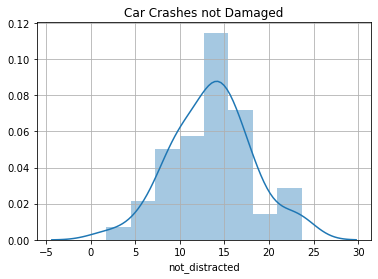

In [16]:
no_distracted = sb.distplot(crashes_df["not_distracted"])
plt.title("Car Crashes not Damaged")
plt.grid()
no_distracted

### 2. Join Plots

c:\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


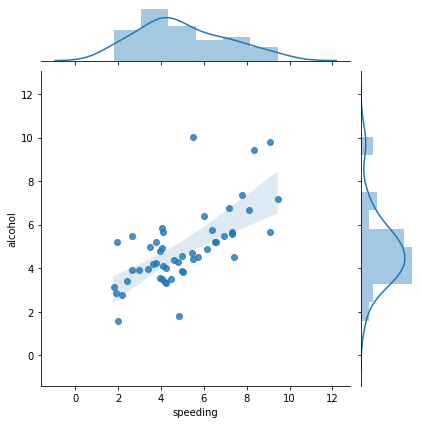

In [22]:
spd_vs_alc = sb.jointplot(x = "speeding", y = "alcohol", data = crashes_df, kind = "reg")
spd_vs_alc

#### 3. KDE Plots

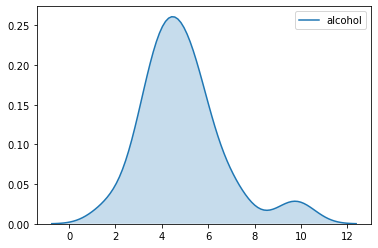

In [34]:
alc = sb.kdeplot(crashes_df["alcohol"], shade = True)
alc

### 4. Pair Plots

c:\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


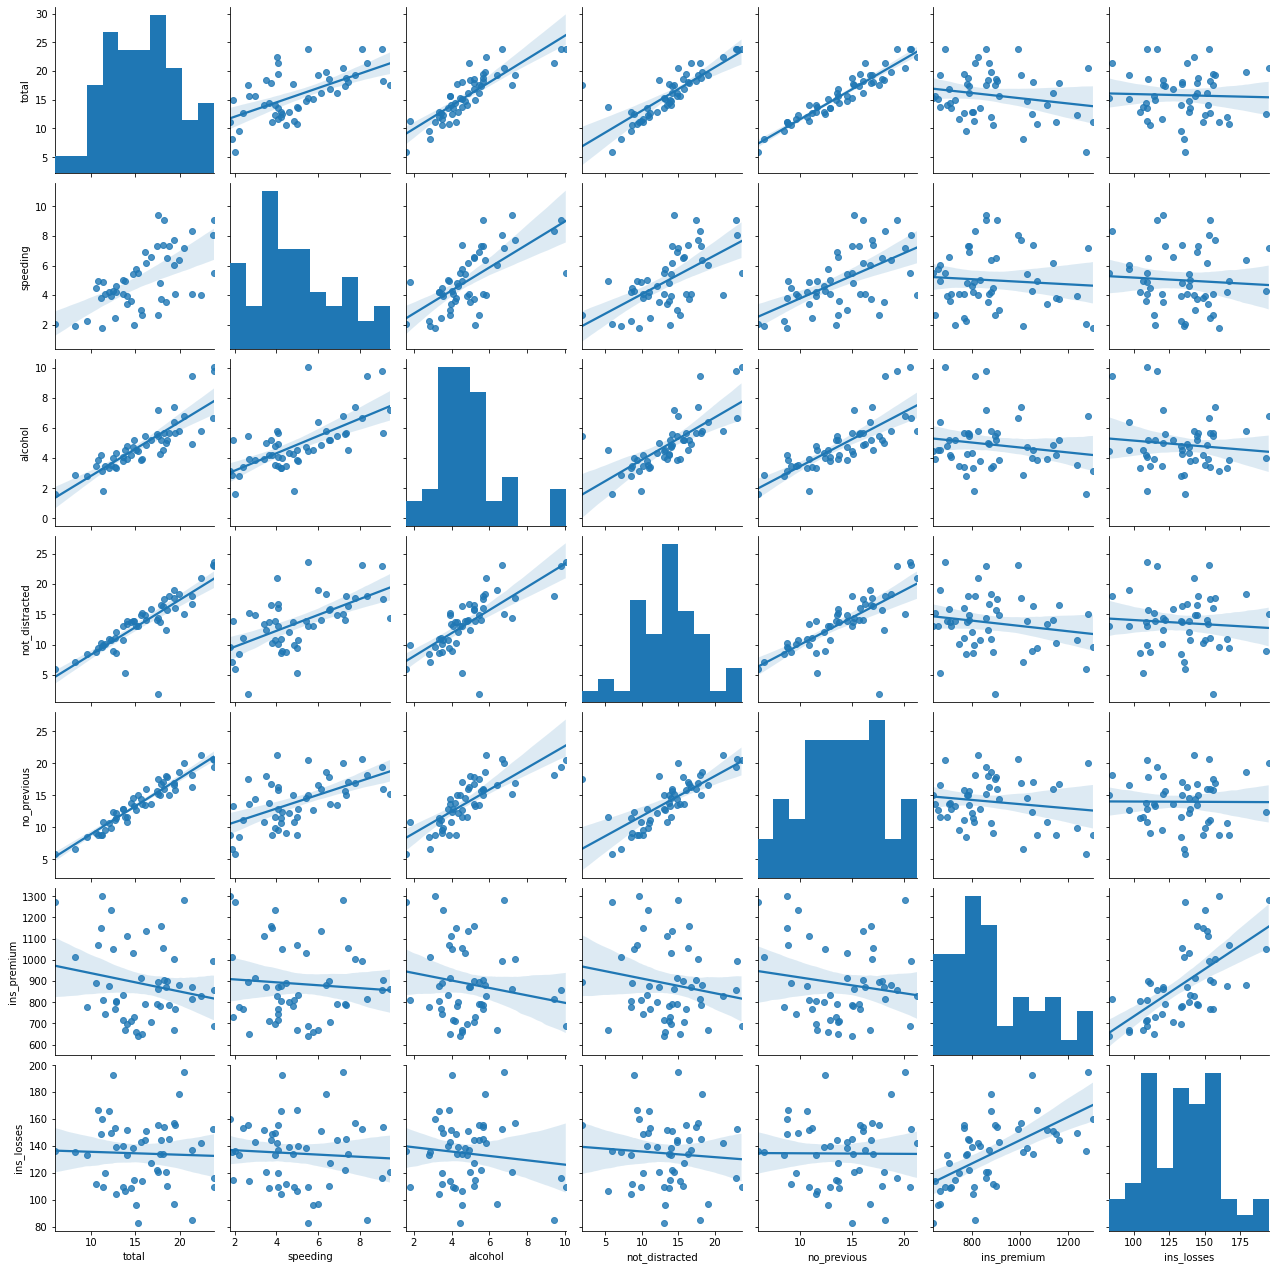

In [36]:
crashes_pair = sb.pairplot(crashes_df, kind = "reg")
crashes_pair

##### Loading another dataset to expand more on Pair plots 

In [44]:
tips_df = sb.load_dataset("tips")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


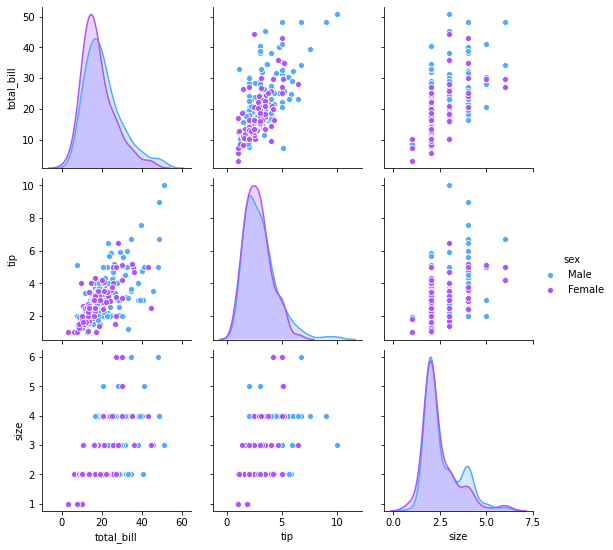

In [63]:
tips_pair = sb.pairplot(tips_df, hue = "sex", palette = "cool")
tips_pair

### 5. Rug Plots

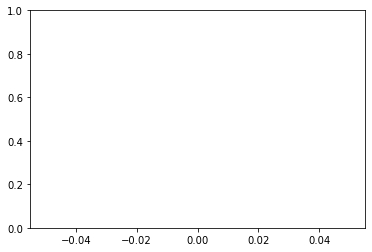

In [65]:
tips_rug = sb.rugplot(tips_df["total_bill"], height = 5)
tips_rug

### 6. Styling Plots

c:\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<Figure size 576x720 with 0 Axes>

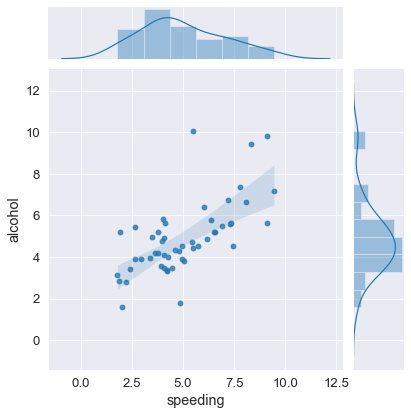

In [74]:
style = sb.set_style("darkgrid")

sb.set_context(context = "paper", font_scale = 1.5)
plt.figure(figsize = (8, 10))
sb.jointplot(x = "speeding", y = "alcohol", data = crashes_df, kind = "reg")

### Categorical Plots
### 1. Bar Plots

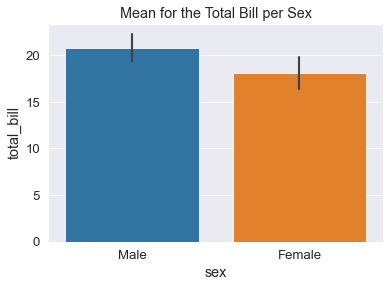

In [84]:
sex_bills = sb.barplot(x = "sex", y = "total_bill", data = tips_df)
plt.title("Mean for the Total Bill per Sex")
sex_bills

# NB : You can use estimator parameter to change the aggregate of the data to be plotted which by default
# is mean.
# Also by passing the numpy lib modules you will be able to achieve the same change in aggregation.
# Example
# sex_bills = sb.barplot(x = "sex", y = "total_bill", data = tips_df, estimator = "median")
#sex_bills = sb.barplot(x = "sex", y = "total_bill", data = tips_df, estimator = np.std)

### 2. Count Plots

No handles with labels found to put in legend.


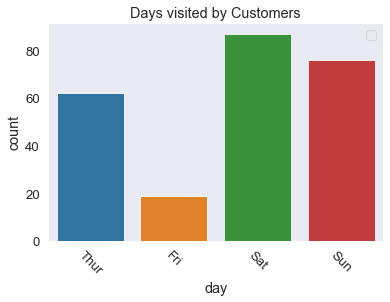

In [166]:
sex_smoker = sb.countplot(x = "day", data = tips_df)
plt.xticks(rotation = -45)
plt.legend(loc = "best")
plt.title("Days visited by Customers")
sex_smoker

### 3. Box Plots

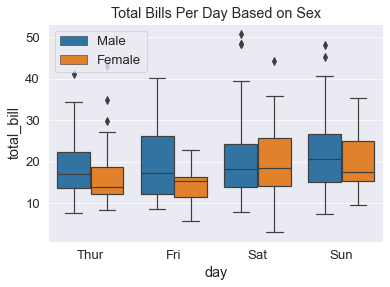

In [98]:
day_vs_bill = sb.boxplot(x = "day", y = "total_bill", data = tips_df, hue = "sex")
plt.title("Total Bills Per Day Based on Sex")
plt.legend(loc = "best")
day_vs_bill

### 4. Violin Plots

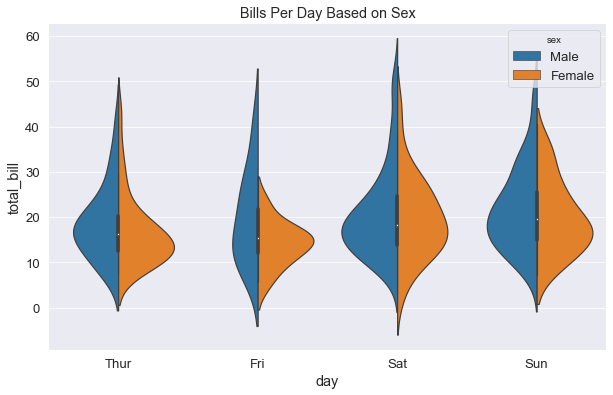

In [105]:
plt.figure(figsize = (10,6))
bill_per_day = sb.violinplot(x = "day", y = "total_bill", data = tips_df, hue = "sex", split = True)

plt.title("Bills Per Day Based on Sex")
bill_per_day

### 5. Strip Plots

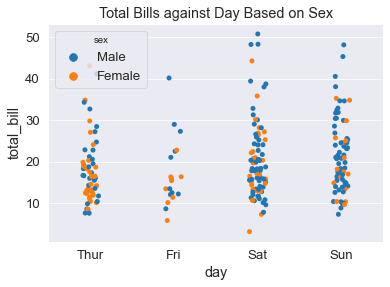

In [110]:
bills_per_day = sb.stripplot(x = "day", y = "total_bill", data = tips_df, hue = "sex")
plt.title("Total Bills against Day Based on Sex")
bills_per_day
# Using dogde = True as a parameter will seperater the categories provided to different columns as in this case male and female

### 6. Swarm plots

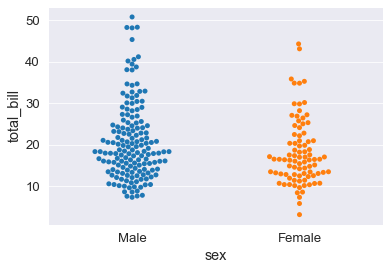

In [111]:
bills_per_day = sb.swarmplot(x = "sex", y = "total_bill", data = tips_df)
bills_per_day

### Palettes

No handles with labels found to put in legend.


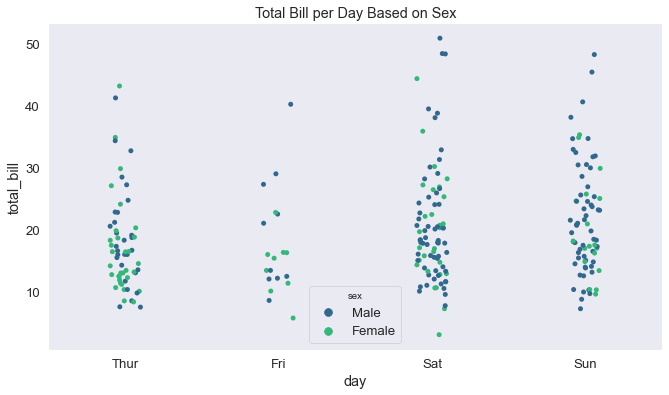

In [128]:
plt.figure(figsize = (11, 6))
sb.set_style("dark")
sb.set_context("paper", font_scale = 1.5)
plt.title("Total Bill per Day Based on Sex")
plt.legend(loc = 0)
sb.stripplot(x = "day", y = "total_bill", data = tips_df, hue = "sex", palette = "viridis")

### Matrix Plots
### 1. Heatmap Plots

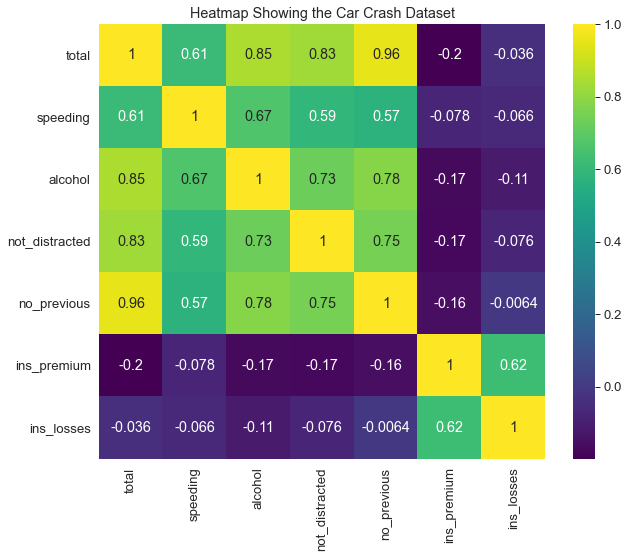

In [138]:
plt.figure(figsize = (10, 8))
plt.title("Heatmap Showing the Car Crash Dataset")
crashes_matrix = crashes_df.corr()
crashes_heat = sb.heatmap(crashes_matrix, annot = True, cmap = "viridis")
crashes_heat

### Another Approach to Heatmaps

##### Load another Dataset

In [139]:
flights_df = sb.load_dataset("flights")
flights_df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


##### Create a pivot table for clear comparison 

In [141]:
flights_pivot = flights_df.pivot(index = "month", columns = "year", values = "passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


##### Now lets create the heatmap based on the pivot table

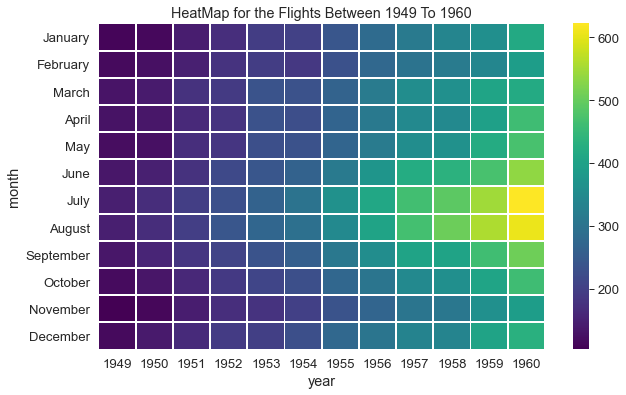

In [150]:
plt.figure(figsize = (10, 6))
plt.title("HeatMap for the Flights Between 1949 To 1960")
sb.heatmap(flights_pivot, cmap = "viridis", linewidth = 1)

### 2. Cluster Maps

In [158]:
iris_df = sb.load_dataset("iris")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [159]:
species = iris_df.pop("species")

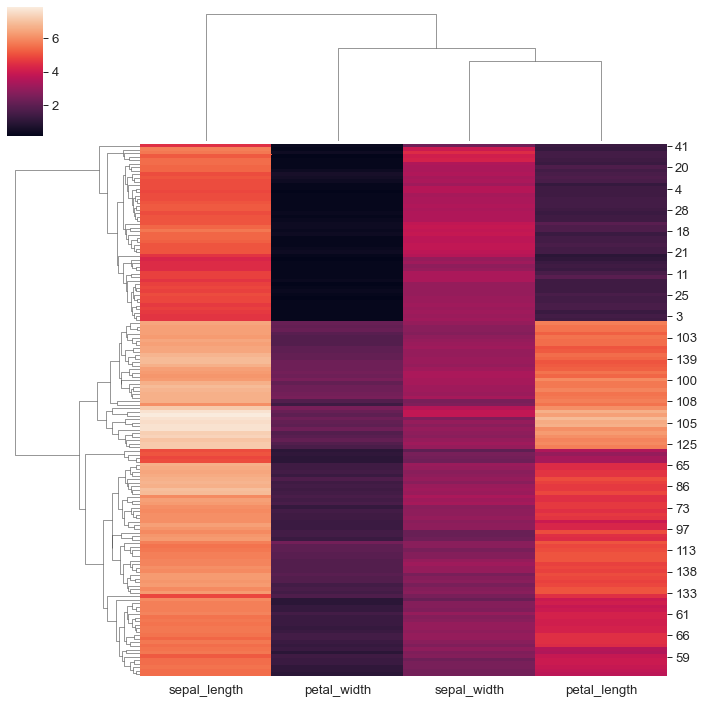

In [161]:
sb.clustermap(iris_df)

#### Trying Cluster Maps on a different Dataset

### 3. Pair Grid Plots